In [1]:
import scipy.io

In [2]:
def load_data(file_name):
    return scipy.io.loadmat(file_name)

In [3]:
ex1 = load_data('example1kinect.mat')
ex2 = load_data('example2kinect.mat')

In [4]:
ex1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Apr 26 16:26:46 2017',
 '__version__': '1.0',
 '__globals__': [],
 'amplitudes1': array([[    0,  1711,  2618, ..., 11774, 17148,     0],
        [    0,  3487,  3862, ...,  6204,  6588,     0],
        [    0,  2883,  1739, ...,  6702,  7729,     0],
        ...,
        [    0,  9210,  7708, ...,  4909,  4566,     0],
        [    0, 17712, 13374, ...,  9831,  7632,     0],
        [    0, 33642, 16712, ...,  6590,  7424,     0]], dtype=uint16),
 'distances1': array([[0.        , 0.        , 0.        , ..., 2.08750653, 9.91966915,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 2.21158051, 0.        ,
         0.        ],
        ...,
        [0.        , 0.81849653, 0.8396064 , ..., 0.86473584, 0.88194507,
         0.        ],
        [0.        , 0.87757653, 0.8493191 , ..., 0.84469038, 0.

In [5]:
import matplotlib
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

### Visualize image

In [6]:
def visualize_amplitude(example, num):
    A = example['amplitudes'+str(num)]
    plt.figure(figsize=(6, 4))
    plt.imshow(A, cmap='gray')
    plt.colorbar()
    plt.title('Amplitude Image')

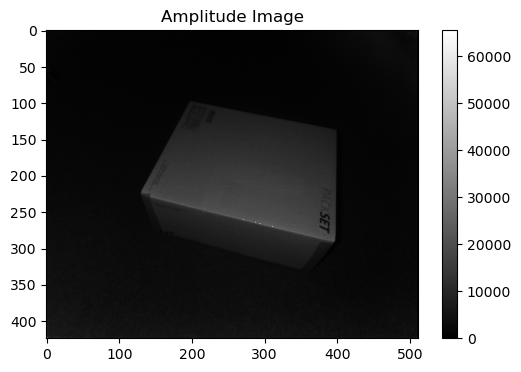

In [7]:
visualize_amplitude(ex1, 1)

In [8]:
import cv2

### Apply median filter

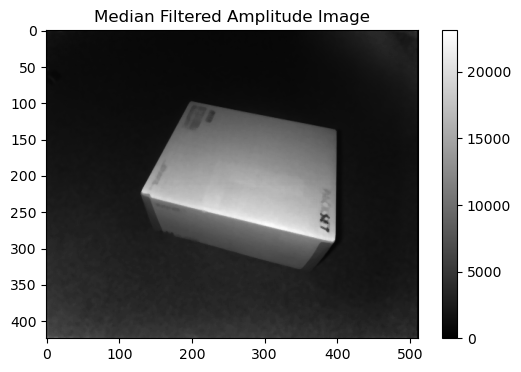

In [9]:
def visualize_amplitude_median_filter(example, num, filter_size=5, visualize=True):
    A = example['amplitudes' + str(num)]
    
    # Applying median filter
    A_filtered = cv2.medianBlur(A.astype(np.float32), filter_size)

    if visualize:
        plt.figure(figsize=(6, 4))
        plt.imshow(A_filtered, cmap='gray')
        plt.colorbar()
        plt.title('Median Filtered Amplitude Image')
        plt.show()
    
    return A_filtered

filtered_image = visualize_amplitude_median_filter(ex1, 1, filter_size=5)

### Apply mean filter

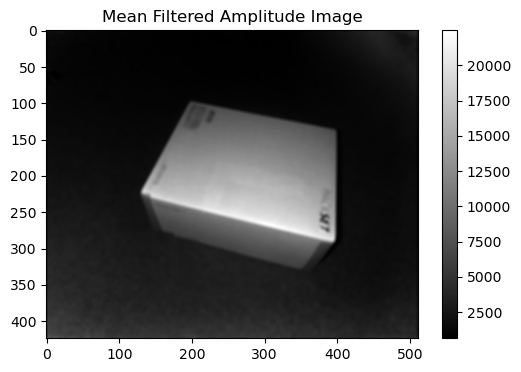

In [10]:
def visualize_amplitude_mean_filter(example, num, filter_size=5):
    # Assuming there was a typo in your code and using only 'A' for the amplitude
    A = example.copy()
    
    # Applying mean filter
    A_filtered = cv2.blur(A.astype(np.float32), (filter_size, filter_size))

    plt.figure(figsize=(6, 4))
    plt.imshow(A_filtered, cmap='gray')
    plt.colorbar()
    plt.title('Mean Filtered Amplitude Image')
    plt.show()
    return cv2.blur(A.astype(np.float32), (filter_size, filter_size))

# Example usage:
mean_filtered_image = visualize_amplitude_mean_filter(filtered_image, 1, filter_size=5)

### Estimating Box Top

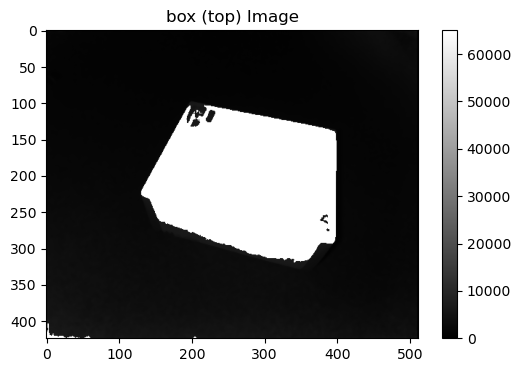

In [11]:
def estimate_the_box(example, num):
    A = example.copy()
    A[A > 6600] = 65000
    
    plt.figure(figsize=(6, 4))
    plt.imshow(A, cmap='gray')
    plt.colorbar()
    plt.title('box (top) Image')
    return A
    
A = estimate_the_box(filtered_image,1)

In [12]:
def plot_image(image, title='Image'):
    plt.figure(figsize=(6, 4))
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.title(title)
    plt.show()

def apply_erosion(image, kernel_size=20):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

def apply_dilation(image, kernel_size=20):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

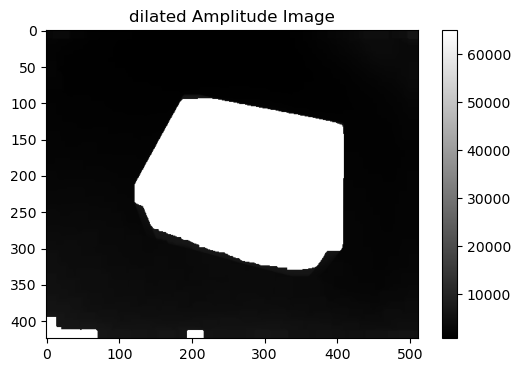

In [13]:
dilated_image = apply_dilation(A)
plot_image(dilated_image, title='dilated Amplitude Image')

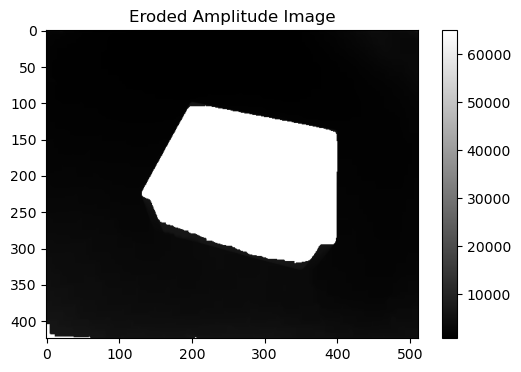

In [14]:
eroded_image = apply_erosion(dilated_image)
plot_image(eroded_image, title='Eroded Amplitude Image')

In [15]:
def visualize_distance(example, num):
    D = example['distances'+str(num)]
    plt.figure(figsize=(6, 4))
    plt.imshow(D, cmap='coolwarm')
    plt.colorbar()
    plt.title('Distance Image')

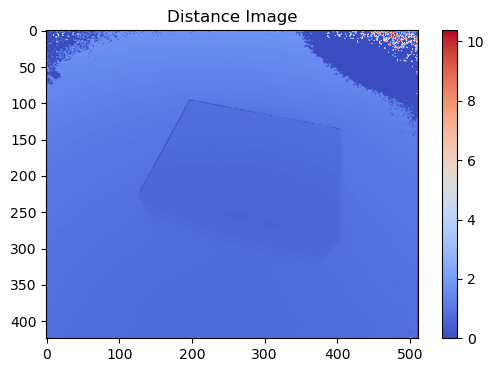

In [16]:
visualize_distance(ex1, 1)